## Observations and Insights 

## Observations/Interferences

1) The data set only had 1 mouse with duplicate timepoints meaning that the dataset was strong going into the analysis.
2) The study had close to a 50/50 split with the gender of mice HOWEVER the final analysis did not take gender into consideration. Due to an even sample size, a better conclusion could have been derived on the effects of each treatment on each gender of mice.
3) Both linear regression and correlation show a strong relationship between the data points for weight vs size of tumor. This is the MOST OBVIOUS conclusion for the MOST OBVIOUS analysis in SCIENTIFIC HISTORY. TUMOR LOSES MASS AS IT SHRINKS WHICH THEN DECREASES THE MASS OF THE MOUSE

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from cstyle import styles

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
mice_data.head().style.set_table_styles(styles)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(mice_data['Mouse ID'].unique())
print(mice_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create duplicate DataFrame for manipulation
mice_data_copy = mice_data

# create new dataframe with just the rows with duplicated Mouse ID and Timepoint column values
dup_data = mice_data_copy[mice_data_copy.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# create list of unique Mouse ID's that have duplicate Timepoints
dup_mice = dup_data['Mouse ID'].unique()
print(dup_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Create new DataFrame with rows from mice_data_copy with duplicate Mouse ID values
dirty_data = mice_data_copy.loc[mice_data_copy['Mouse ID'].isin(dup_mice), :]

# As a precaution, remove any duplicate rows from dirty_dirty and reset index
unique_dirty_data = dirty_data.drop_duplicates().reset_index(drop=True)
unique_dirty_data.head().style.set_table_styles(styles)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,5,48.786801,0
2,g989,Propriva,Female,21,26,5,47.570392,0
3,g989,Propriva,Female,21,26,10,51.745156,0
4,g989,Propriva,Female,21,26,10,49.880528,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use index from locating all duplicate Mouse ID data to clean data and reset index
clean_data = mice_data_copy.drop(index = dirty_data.index).reset_index(drop=True)
clean_data.head().style.set_table_styles(styles)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_data['Mouse ID'].unique())
print(clean_mice_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_list = [regimen for regimen in clean_data['Drug Regimen'].unique()]
avg_vol = []
med_vol = []
var_vol = []
std_vol = []
sem_vol = []

for regimen in regimen_list:
    avg_vol.append(np.mean(clean_data.loc[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']))
    med_vol.append(np.median(clean_data.loc[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']))
    var_vol.append(np.var(clean_data.loc[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']))
    std_vol.append(np.std(clean_data.loc[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']))
    sem_vol.append(st.sem(clean_data.loc[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']))

regimen_summary_series = pd.DataFrame({'Drug Regimen': regimen_list,
                                'Tumor Vol. Avg': avg_vol,
                                'Tumor Vol. Median': med_vol,
                                'Tumor Vol. Variance': var_vol,
                                'Tumor Vol. Std Deviation': std_vol,
                                'Tumor Vol. SEM': sem_vol})

regimen_summary_series.head().style.set_table_styles(styles)

,Drug Regimen,Tumor Vol. Avg,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std Deviation,Tumor Vol. SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_vol = clean_data.groupby(['Drug Regimen'])

avg_vol_grp = tumor_vol['Tumor Volume (mm3)'].mean()
med_vol_grp = tumor_vol['Tumor Volume (mm3)'].median()
var_vol_grp = tumor_vol['Tumor Volume (mm3)'].var()
std_vol_grp = tumor_vol['Tumor Volume (mm3)'].std()
sem_vol_grp = tumor_vol['Tumor Volume (mm3)'].sem()

regimen_summary_grouped = pd.DataFrame({'Tumor Vol. Avg': avg_vol_grp,
                                'Tumor Vol. Median': med_vol_grp,
                                'Tumor Vol. Variance': var_vol_grp,
                                'Tumor Vol. Std Deviation': std_vol_grp,
                                'Tumor Vol. SEM': sem_vol_grp})

regimen_summary_grouped.head().style.set_table_styles(styles)

,Tumor Vol. Avg,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std Deviation,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

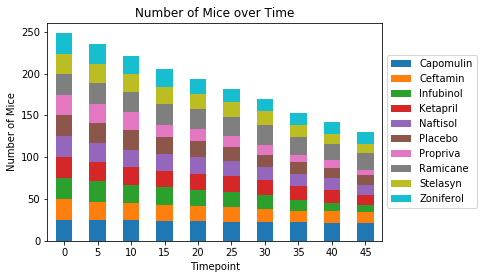

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_over_time = clean_data.groupby(['Timepoint'])['Drug Regimen'].value_counts().unstack('Drug Regimen')
bar_plot_df = mice_over_time.plot(kind='bar', stacked=True, rot=1)

bar_plot_df.set_title('Number of Mice over Time')
bar_plot_df.set_xlabel('Timepoint')
bar_plot_df.set_ylabel('Number of Mice')

bar_plot_df.legend(loc='center left',bbox_to_anchor=(1,0.5))

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


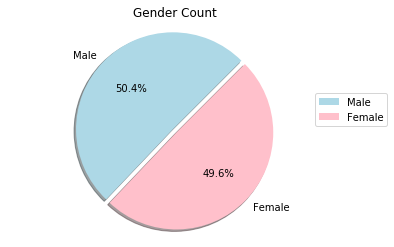

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_data['Sex'].unique()
male_mice = clean_data.loc[clean_data['Sex'] == 'Male'].nunique()
female_mice = clean_data.loc[clean_data['Sex'] == 'Female'].nunique()

mice_sex_df = pd.DataFrame({'Gender Count': [male_mice['Mouse ID'], female_mice['Mouse ID']]},
                             index=mice_sex)

colors = ['lightblue', 'pink']
explode = (0.05,0)

mice_pie_df = mice_sex_df.plot.pie(y='Gender Count', explode=explode, colors=colors, 
                                   autopct="%1.1f%%", startangle=45, shadow=True, label='')

plt.title('Gender Count')
plt.axis('equal')
plt.legend(loc='lower right',bbox_to_anchor=(1.15,0.5))

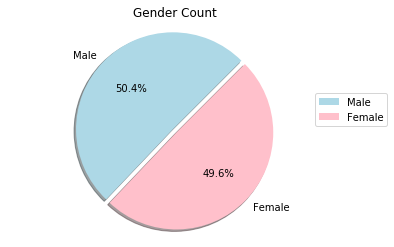

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_sex
sizes = [male_mice['Mouse ID'], female_mice['Mouse ID']]

mice_sex_plt = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct="%1.1f%%", startangle=45, shadow=True)

plt.title('Gender Count')
plt.axis('equal')
plt.legend(loc='lower right',bbox_to_anchor=(1.15,0.5))

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sub_regimen_data = clean_data.loc[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = sub_regimen_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_mice_data = pd.merge(final_timepoints, sub_regimen_data, how='inner', on=('Mouse ID', 'Drug Regimen', 'Timepoint'))

In [62]:
# Put treatments into a list for for loop (and later for plot labels)
sub_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_mice_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The interquartile range of tumor volume is: {iqr}')
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

lower_outliers = final_mice_data.loc[final_mice_data['Tumor Volume (mm3)'] < lower_bound]
upper_outliers = final_mice_data.loc[final_mice_data['Tumor Volume (mm3)'] > upper_bound]

# Locate the rows which contain mice on each drug and get the tumor volumes
final_tumor_data = final_mice_data.loc[final_mice_data['Drug Regimen'].isin(sub_regimen)]
    
# add subset
tumor_vol.append([tumor for tumor in final_tumor_data['Tumor Volume (mm3)']])
    
# Determine outliers using upper and lower bounds
outliers = ([tumor for tumor in final_tumor_data['Tumor Volume (mm3)'] if (tumor > upper_bound) | (tumor < lower_bound)])
print(f'There are {len(outliers)} outliers.')

The interquartile range of tumor volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
There are 0 outliers.


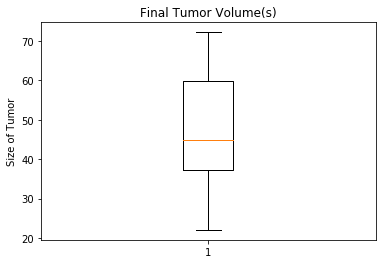

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, mice_box = plt.subplots()
mice_box.set_title('Final Tumor Volume(s)')
mice_box.set_ylabel('Size of Tumor')
mice_box.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

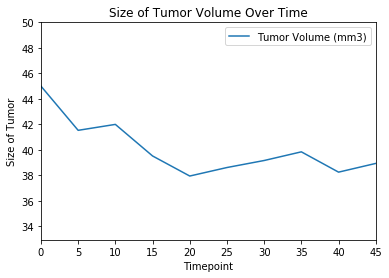

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
random_mice_pool = capo_data['Mouse ID'].unique()

randy_the_rando = random_mice_pool[np.random.randint(1, len(random_mice_pool))]
randy_the_rando

capo_line_data = capo_data.loc[capo_data['Mouse ID'] == randy_the_rando][['Timepoint', 'Tumor Volume (mm3)']]
capo_line = capo_line_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

plt.xlim(capo_line_data['Timepoint'].min(), capo_line_data['Timepoint'].max())
plt.ylim(capo_line_data['Tumor Volume (mm3)'].min() - 5, capo_line_data['Tumor Volume (mm3)'].max() + 5)

plt.title('Size of Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Size of Tumor')

plt.show()

Text(0, 0.5, 'Average Weight')

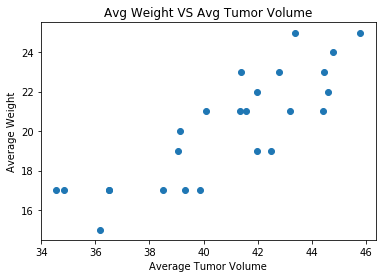

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor = capo_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
weight = capo_data.groupby(['Mouse ID'])['Weight (g)'].mean()
capo_scatter = plt.scatter(x=avg_tumor,y=weight)

plt.title('Avg Weight VS Avg Tumor Volume')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Average Weight')

## Correlation and Regression

The correlation between both factors is 0.84


Text(0, 0.5, 'Average Weight')

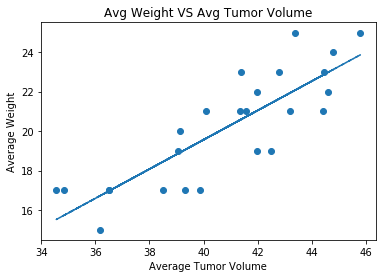

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor, weight)
print(f'The correlation between both factors is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor, weight)
regress_values = avg_tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=avg_tumor,y=weight)
plt.plot(avg_tumor, regress_values, '--')
plt.title('Avg Weight VS Avg Tumor Volume')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Average Weight')